In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from statistics import mean
%matplotlib inline

In [2]:
df = pd.read_csv('Train.csv')
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df.count()

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
one=int(1)
two=int(2)
ze=int(0)
mo = int(-1)
df['O_Type'] = df['Outlet_Type'].map({'Supermarket Type1':one,'Supermarket Type2':two,'Grocery Store':ze})
df.drop('Outlet_Type',inplace=True,axis=1)

df['Outlet_Size']=df['Outlet_Size'].map({'Small':ze,'Medium':one,'High':two,np.nan:mo })

df['Fat_Content'] = df['Item_Fat_Content'].map({'LF':ze,'reg':one,'low fat':ze,'Low Fat':ze,'Regular':one})
df.drop('Item_Fat_Content',inplace=True,axis=1)

df['Item_Type_int'] = df['Item_Type'].map({'Dairy':1, 'Soft Drinks':2, 'Meat':3, 'Fruits and Vegetables':4,
       'Household':5, 'Baking Goods':6, 'Snack Foods':7, 'Frozen Foods':8,
       'Breakfast':9, 'Health and Hygiene':10, 'Hard Drinks':11, 'Breads':12,
       'Canned':13, 'Starchy Foods':14, 'Others':15, 'Seafood':16})
df.drop('Item_Type',inplace=True,axis=1)

df['Item_Visibility'].replace(0,0.06400489326611195,inplace=True)


In [6]:
df['Fat_Content'].unique()

array([0, 1], dtype=int64)

In [7]:
df.drop(['Outlet_Identifier'],inplace=True,axis=1)

In [8]:
df.drop(['Outlet_Establishment_Year'],inplace=True,axis=1)

In [9]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,O_Type,Fat_Content,Item_Type_int
0,FDA15,9.30,0.016047,249.8092,1,Tier 1,3735.1380,1.0,0,1
1,DRC01,5.92,0.019278,48.2692,1,Tier 3,443.4228,2.0,1,2
2,FDN15,17.50,0.016760,141.6180,1,Tier 1,2097.2700,1.0,0,3
3,FDX07,19.20,0.064005,182.0950,-1,Tier 3,732.3800,0.0,1,4
4,NCD19,8.93,0.064005,53.8614,2,Tier 3,994.7052,1.0,0,5


In [10]:
av = mean(df['Item_Weight'])
av
df['Item_Weight'].replace(np.nan,11.5)


0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
5       10.395
6       13.650
7       11.500
8       16.200
9       19.200
10      11.800
11      18.500
12      15.100
13      17.600
14      16.350
15       9.000
16      11.800
17       9.000
18      11.500
19      13.350
20      18.850
21      11.500
22      14.600
23      11.500
24      13.850
25      13.000
26       7.645
27      11.650
28       5.925
29      11.500
         ...  
8493     7.420
8494    15.200
8495     9.695
8496     7.420
8497    13.650
8498    15.350
8499    11.600
8500    20.350
8501     5.340
8502     8.420
8503    20.500
8504    11.500
8505    10.500
8506    17.250
8507     5.880
8508    11.350
8509     8.100
8510    13.800
8511    17.500
8512    20.700
8513    12.000
8514    15.000
8515    20.700
8516    18.600
8517    20.750
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [11]:
av

nan

In [12]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df.count()

Item_Identifier         7060
Item_Weight             7060
Item_Visibility         7060
Item_MRP                7060
Outlet_Size             7060
Outlet_Location_Type    7060
Item_Outlet_Sales       7060
O_Type                  7060
Fat_Content             7060
Item_Type_int           7060
dtype: int64

In [13]:
df['O_Type'].unique()

array([1., 2., 0.])

In [14]:
sales1=sales2=sales3=0

for i in range(0,len(df)):
    if df.loc[i]['O_Type'] == 1:
        sales1+=df.loc[i]['Item_Outlet_Sales']
    elif df.loc[i]['O_Type'] == 2:
        sales2+=df.loc[i]['Item_Outlet_Sales']
    else:
        sales3+=df.loc[i]['Item_Outlet_Sales']

In [15]:
sales1

12917342.262999993

In [16]:
sales2, sales3

(1851822.8300000012, 188340.17240000013)

Text(0,0.5,'Sales Count')

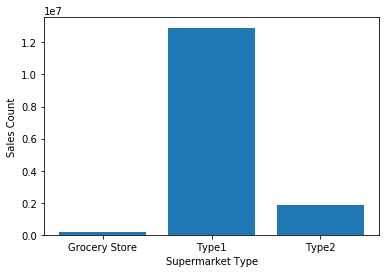

In [17]:
fig,axes = plt.subplots()
axes.bar(['Type1','Type2','Grocery Store'],[sales1,sales2,sales3])
axes.set_xlabel('Supermarket Type')
axes.set_ylabel('Sales Count')

In [18]:
df['Type'] = df['Item_Identifier'].apply(lambda x:x[:2])
df['Type'] = df['Type'].map({'FD':'1','DR':'2','NC':'3'})

In [19]:
df['OL_Type'] = df['Outlet_Location_Type'].map({'Tier 1':1,'Tier 2':2,'Tier 3':3})

In [20]:
df['O_Type'].replace(-1,np.nan)
df.dropna(axis=0)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,O_Type,Fat_Content,Item_Type_int,Type,OL_Type
0,FDA15,9.300,0.016047,249.8092,1,Tier 1,3735.1380,1.0,0,1,1,1
1,DRC01,5.920,0.019278,48.2692,1,Tier 3,443.4228,2.0,1,2,2,3
2,FDN15,17.500,0.016760,141.6180,1,Tier 1,2097.2700,1.0,0,3,1,1
3,FDX07,19.200,0.064005,182.0950,-1,Tier 3,732.3800,0.0,1,4,1,3
4,NCD19,8.930,0.064005,53.8614,2,Tier 3,994.7052,1.0,0,5,3,3
5,FDP36,10.395,0.064005,51.4008,1,Tier 3,556.6088,2.0,1,6,1,3
6,FDO10,13.650,0.012741,57.6588,2,Tier 3,343.5528,1.0,1,7,1,3
7,FDH17,16.200,0.016687,96.9726,-1,Tier 2,1076.5986,1.0,1,8,1,2
8,FDU28,19.200,0.094450,187.8214,-1,Tier 2,4710.5350,1.0,1,8,1,2
9,FDY07,11.800,0.064005,45.5402,1,Tier 1,1516.0266,1.0,0,4,1,1


In [21]:
x_train,x_test,y_train,y_test = train_test_split(df[['Item_Weight','Fat_Content','Item_Visibility','Outlet_Size','OL_Type','Type','Item_MRP','O_Type','Item_Type_int']],df['Item_Outlet_Sales'])

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
lr.score(x_test,y_test)*100

46.05260861619919

In [25]:
l = Lasso()
l.fit(x_train,y_train)
l.score(x_test,y_test)*100

45.946885155978244

In [26]:
r = Ridge(alpha=0.01,normalize=True,random_state=42)
r.fit(x_train,y_train)
r.score(x_test,y_test)*100

46.0347343441453